       id    target                                       comment_text  \
0   59856  0.893617               haha you guys are a bunch of losers.   
1  239607  0.912500  Yet call out all Muslims for the acts of a few...   
2  239612  0.830769  This bitch is nuts. Who would read a book by a...   
3  240311  0.968750                                   You're an idiot.   
4  240329  0.900000  Who cares!? Stark trek and Star Wars fans are ...   

   severe_toxicity   obscene  identity_attack    insult  threat  asian  \
0         0.021277  0.000000         0.021277  0.872340  0.0000    0.0   
1         0.050000  0.237500         0.612500  0.887500  0.1125    0.0   
2         0.107692  0.661538         0.338462  0.830769  0.0000    0.0   
3         0.031250  0.062500         0.000000  0.968750  0.0000    NaN   
4         0.100000  0.200000         0.000000  0.900000  0.0000    NaN   

   atheist  ...  article_id    rating  funny  wow  sad  likes  disagree  \
0      0.0  ...        2006  reject

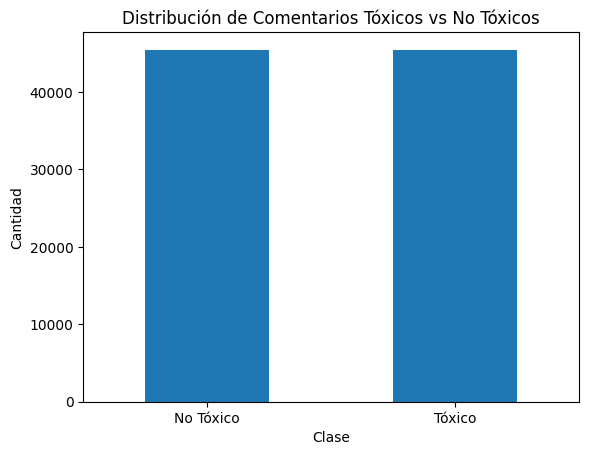

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
train = pd.read_csv("C:/Users/ddani/Desktop/Aplicación de Machine Learning con Interfaz Web/Toxic_comment_classifier/data/data.csv")

# Ver primeras filas
print(train.head())

# Info del dataset
print(train.info())

# Crear columna binaria (toxic = 1 si target >= 0.5)
train['toxic'] = (train['target'] >= 0.5).astype(int)

# Distribucion de clases
print(train['toxic'].value_counts())

# Grafico de Distribucion
train['toxic'].value_counts().plot(kind='bar')
plt.title("Distribución de Comentarios Tóxicos vs No Tóxicos")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["No Tóxico", "Tóxico"], rotation=0)
plt.show()

In [2]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define basic cleaning function (no NLTK required)
def limpiar_texto(texto):
    if texto is None:
        return ''
    # Lowercase
    texto = texto.lower()
    # Remove numbers
    texto = re.sub(r"\d+", "", texto)
    # Remove punctuation
    texto = re.sub(r"[^\w\s]", "", texto)
    # Remove stopwords (English) using sklearn's built-in list
    stop_words = set(ENGLISH_STOP_WORDS)
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]
    return ' '.join(palabras)

# Apply cleaning to the comments column (adjust column name if needed)
train['comentario_limpio'] = train['comment_text'].apply(limpiar_texto)

# Show example of cleaned text
print(train[['comment_text', 'comentario_limpio']].head())

                                        comment_text  \
0               haha you guys are a bunch of losers.   
1  Yet call out all Muslims for the acts of a few...   
2  This bitch is nuts. Who would read a book by a...   
3                                   You're an idiot.   
4  Who cares!? Stark trek and Star Wars fans are ...   

                                   comentario_limpio  
0                             haha guys bunch losers  
1  muslims acts pilloried okay smear entire relig...  
2                         bitch nuts read book woman  
3                                        youre idiot  
4         cares stark trek star wars fans dorks laid  


In [3]:
# Revisar valores nulos en las columnas clave
print("Valores nulos por columna:")
print(train[['comment_text', 'target']].isnull().sum())

# Eliminar filas con valores nulos en comentarios o target
train = train.dropna(subset=['comment_text', 'target'])
print(f"Shape después de eliminar nulos: {train.shape}")

Valores nulos por columna:
comment_text    0
target          0
dtype: int64
Shape después de eliminar nulos: (90902, 47)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pathlib import Path
import joblib


# Vectorización TF-IDF sobre la columna de comentarios limpios
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train['comentario_limpio'])
y = train['toxic']

# Crear carpeta para artefactos si no existe
artifacts_dir = Path('../artifacts')
artifacts_dir.mkdir(parents=True, exist_ok=True)

# Guardar el vectorizador para uso posterior
vec_path = artifacts_dir / 'vectorizer.pkl'
joblib.dump(vectorizer, vec_path)
print(f"Vectorizer guardado en: {vec_path.resolve()}")

print(f"Shape de X (matriz TF-IDF): {X.shape}")
print(f"Shape de y (target): {y.shape}")

Vectorizer guardado en: C:\Users\ddani\Desktop\Aplicación de Machine Learning con Interfaz Web\Toxic_comment_classifier\artifacts\vectorizer.pkl
Shape de X (matriz TF-IDF): (90902, 5000)
Shape de y (target): (90902,)


In [5]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (72721, 5000)
Tamaño de X_test: (18181, 5000)
Tamaño de y_train: (72721,)
Tamaño de y_test: (18181,)


In [6]:
import pickle
from pathlib import Path

# Crear carpeta para artefactos si no existe
artifacts_dir = Path('../artifacts')
artifacts_dir.mkdir(parents=True, exist_ok=True)

# Guardar los splits en un solo archivo pickle
out_path = artifacts_dir / 'data_splits.pkl'
with open(out_path, 'wb') as f:
    pickle.dump({
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
    }, f)

print(f"Saved data splits to {out_path.resolve()}")

Saved data splits to C:\Users\ddani\Desktop\Aplicación de Machine Learning con Interfaz Web\Toxic_comment_classifier\artifacts\data_splits.pkl
